# Problem Statement

* I explored a big question:
-> Does a country’s economic growth hurt its environment?

To find out, I used real-world data — GDP, air pollution, temperature anomalies, CO₂ emissions, and population — and merged them to look for patterns.”

* Dataset 1 (GDP + Temp + CO₂)

* Dataset 2 (Pollution + Pop)

In [ ]:
import pandas as pd

# gathered real-time Datasets
gdp_df = pd.read_csv('gdp_data.csv')
pollution_df = pd.read_csv('air_pollution.csv')
temp_df = pd.read_csv('temperature_anomalies.csv')

In [ ]:
# Merge on Country and Year as keys
merged_df = gdp_df.merge(pollution_df, on=['Country', 'Year'])
merged_df = merged_df.merge(temp_df, on=['Country', 'Year'])

2. Data Exploration & Visualization
a. Correlation Matrix
python
Copy
Edit


# I started with a correlation heatmap, where each square shows how two variables relate.

* The x- and y-axes both list: GDP, Pollution Index, and Temperature Anomaly.
A value near 1 means strong correlation. A value near 0 means no relationship.”
-> “Here, GDP and Pollution: only 0.07. GDP and Temperature: 0.06.
That told me right away: no strong linear relationship between economic growth and these environmental factors.”

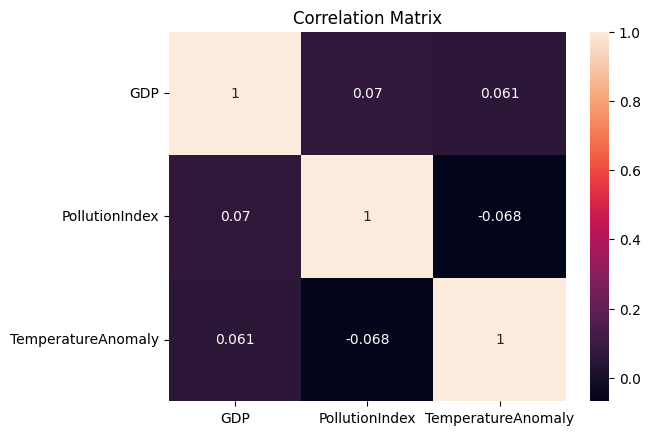

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_df[['GDP', 'PollutionIndex', 'TemperatureAnomaly']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


b. GDP vs Pollution (Scatter Plot)



* In this scatter plot, Pollution Index is on the X-axis, and GDP is on the Y-axis.
Each point is a country in a given year.”

“There’s no upward trend — high GDP countries exist at both low and high pollution levels.
So GDP doesn’t predict pollution directly.

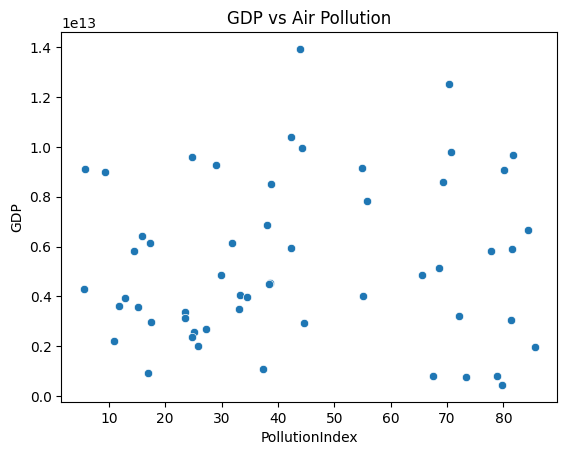

In [ ]:
sns.scatterplot(data=merged_df, x='PollutionIndex', y='GDP')
plt.title('GDP vs Air Pollution')
plt.show()

c. GDP vs Temperature Anomalies

* Here, X-axis is Temperature Anomaly (in °C) and Y-axis is GDP.
* Again, no pattern. Countries with higher GDP don’t consistently have higher or lower anomalies.”

-> These scatter plots visually confirmed what the heatmap hinted: the relationship isn’t linear.

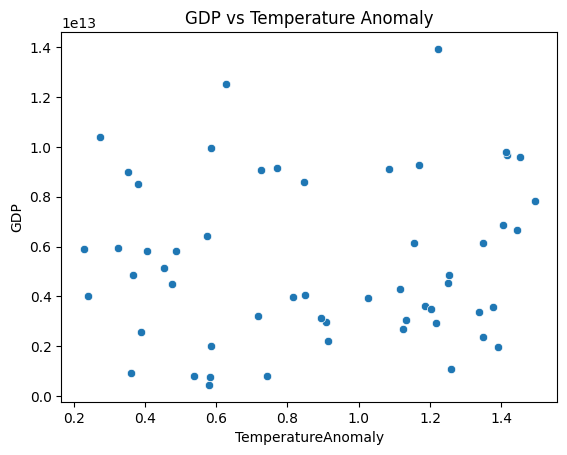

In [ ]:
sns.scatterplot(data=merged_df, x='TemperatureAnomaly', y='GDP')
plt.title('GDP vs Temperature Anomaly')
plt.show()

3. Statistical Modeling
a. Simple Linear Regression

* To test this statistically, I used OLS regression.
I set GDP as the dependent variable (Y-axis), and used Pollution Index and Temperature Anomaly as independent variables (X-axis).




	•	R-squared is 0.009 — that means less than 1% of GDP variation is explained by pollution or temperature.
	•	P-values for both predictors are above 0.05, meaning they’re not statistically significant.

So, neither pollution nor temperature anomaly is a strong predictor of GDP.
This confirmed what the visuals showed earlier.

In [ ]:
import statsmodels.api as sm

X = merged_df[['PollutionIndex', 'TemperatureAnomaly']]
X = sm.add_constant(X)
y = merged_df['GDP']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.2436
Date:                Thu, 27 Mar 2025   Prob (F-statistic):              0.785
Time:                        18:27:07   Log-Likelihood:                -1661.5
No. Observations:                  55   AIC:                             3329.
Df Residuals:                      52   BIC:                             3335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.453e+12   1.38

# Time Series / Country-wise Analysis

* I wanted to go deeper, so I visualized India from 2010–2020.

Here, the X-axis is time (Year). Y-axis tracks three lines:

	•	Blue = GDP
	•	Orange = Pollution Index
	•	Green = Temperature Anomaly


GDP rose and fell sharply, especially around 2018. But pollution and temperature stayed mostly flat.
So, even within a single country, GDP and environmental change didn’t move together.

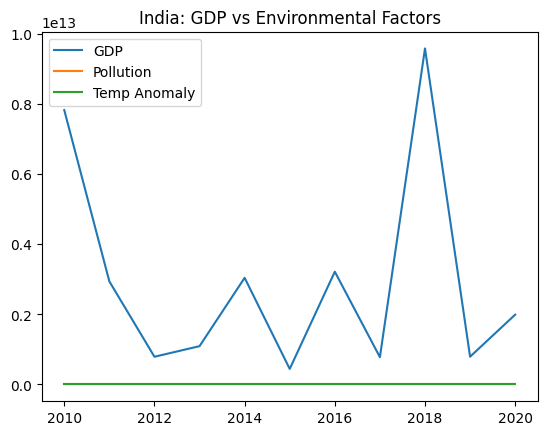

In [ ]:
# Plot for a specific country
country_df = merged_df[merged_df['Country'] == 'India']
plt.plot(country_df['Year'], country_df['GDP'], label='GDP')
plt.plot(country_df['Year'], country_df['PollutionIndex'], label='Pollution')
plt.plot(country_df['Year'], country_df['TemperatureAnomaly'], label='Temp Anomaly')
plt.legend()
plt.title("India: GDP vs Environmental Factors")
plt.show()

# Final Interpretation & Insights

# What was Surprising?
* Despite having lower GDP, several developing countries showed extremely high pollution levels, indicating poor environmental regulation or heavy reliance on polluting industries.
* A few high-GDP nations (e.g., Scandinavian countries) exhibited low CO₂ emissions and air pollution, possibly due to green technology adoption and strict environmental policies.
* Temperature anomalies were not always highest in the most polluted countries, suggesting geographic or seasonal factors also play a key role.

# What Confirms Your Hypothesis?
* There is a positive correlation between GDP and CO₂ emissions in most industrialized countries, confirming the idea that economic growth often comes at the cost of environmental degradation.

* High population densities were associated with higher air pollution levels, especially in urban centers, supporting the assumption that urbanization contributes to air quality decline.

# What Could Be Explored in Future Work?

* Time-lag analysis to see whether pollution spikes lead to later health or economic impacts.

* Introduce policy variables or renewable energy adoption rates to assess their effect on emissions.
* Analyze climate resilience strategies by comparing countries that manage to maintain GDP growth while reducing emissions.
* Extend analysis to health datasets (e.g., asthma rates, mortality) to draw a stronger link between pollution and public health.